In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [4]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


In [22]:
df_original = pd.DataFrame(features_orig, columns=[ f'feature_{i}' for i in range(35)])

In [23]:
df_original.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,273.0,0.000025,1.0,2.710000e-26,0.0,81.0,119.0,0.0,105.0,229.0,...,8936.0,95.5363,34.169839,24.0,23.0,2.0,8.0,2.5153,2.7535,2.1026
1,273.0,0.000025,2.0,2.780000e-26,0.0,65.0,81.0,1.0,111.0,213.0,...,9090.0,95.5073,34.245992,30.0,35.0,1.0,7.0,2.5335,2.9188,1.8783
2,273.0,0.000025,3.0,7.850000e-26,4.0,204.0,168.0,24.0,306.0,304.0,...,26399.0,96.0506,34.609982,700.0,376.0,0.0,17.0,7.3030,8.4074,4.3813
3,273.0,0.000025,4.0,1.220000e-25,8.0,178.0,246.0,46.0,383.0,282.0,...,40689.0,96.3417,34.742688,1858.0,823.0,0.0,11.0,9.5565,11.0017,5.5250
4,273.0,0.000025,5.0,1.860000e-25,18.0,204.0,269.0,57.0,451.0,328.0,...,62641.0,96.5052,34.859251,3575.0,1350.0,0.0,28.0,9.8630,11.1281,5.5505


In [24]:
df = df_original

## unique values in features 0-2

In [82]:
unique_values_a = df['feature_0'].unique()
print(len(list(unique_values_a)))
print(list(unique_values_a))


16
[273.0, 303.0, 323.0, 373.0, 423.0, 473.0, 523.0, 573.0, 623.0, 673.0, 723.0, 773.0, 823.0, 873.0, 923.0, 973.0]


In [81]:
unique_values_a = df['feature_0'].value_counts()
print(unique_values_a)
print(unique_values_a.shape)

323.0    700
523.0    700
723.0    700
923.0    700
273.0    100
303.0    100
373.0    100
423.0    100
473.0    100
573.0    100
623.0    100
673.0    100
773.0    100
823.0    100
873.0    100
973.0     99
Name: feature_0, dtype: int64
(16,)


In [108]:
unique_values_gr = df['feature_1'].unique()
print(len(list(unique_values_gr)))
print(list(unique_values_gr))


11
[2.5e-05, 5e-05, 7.5e-05, 0.0001, 0.000125, 0.00015, 0.000175, 0.0002, 0.000225, 0.00025, 0.0]


In [109]:
unique_values_gr_ = df['feature_1'].value_counts()
print(unique_values_gr_)
print(unique_values_gr_.shape)

0.000000    2400
0.000025     160
0.000050     160
0.000075     160
0.000100     160
0.000125     160
0.000150     160
0.000175     160
0.000200     160
0.000225     160
0.000250     159
Name: feature_1, dtype: int64
(11,)


In [104]:
unique_values_time = df['feature_2'].unique()
print(len(list(unique_values_time)))
print(list(unique_values_time))


10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [105]:
unique_values_time_ = df['feature_2'].value_counts()
print(unique_values_time_)
print(unique_values_time_.shape)

10.0    2559
1.0      160
2.0      160
3.0      160
4.0      160
5.0      160
6.0      160
7.0      160
8.0      160
9.0      160
Name: feature_2, dtype: int64
(10,)


In [34]:
unexplained_df = df[df['feature_1'] == 0 ]
print(unexplained_df.shape)
unexplained_df.head()

(2400, 35)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
200,323.0,0.0,10.0,4.000000e-27,0.0,24.0,44.0,4.0,27.0,1.0,...,1131.0,95.1746,34.681334,74.0,4.0,0.0,0.0,9.2966,12.0323,7.5175
201,323.0,0.0,10.0,4.030000e-27,6.0,39.0,26.0,16.0,44.0,36.0,...,1158.0,94.8777,34.453234,41.0,37.0,0.0,6.0,8.5462,10.4950,7.1095
202,323.0,0.0,10.0,4.100000e-27,0.0,27.0,35.0,7.0,34.0,12.0,...,1172.0,94.8912,34.568346,62.0,16.0,0.0,0.0,8.6446,11.5155,6.7241
203,323.0,0.0,10.0,4.180000e-27,0.0,62.0,34.0,14.0,61.0,30.0,...,1198.0,94.9195,34.568026,39.0,38.0,0.0,4.0,8.8259,10.7500,7.5170
204,323.0,0.0,10.0,4.230000e-27,2.0,27.0,20.0,10.0,35.0,10.0,...,1210.0,94.9330,34.773175,72.0,8.0,0.0,0.0,9.0240,12.0000,6.9730


In [40]:
#check if there are any otehr values otehr than 10.0
for val in unexplained_df['feature_2']:
    if int(val) != 10:
        print('T')

#same thing 
print(unexplained_df['feature_2'].unique())

#distribution = sanity check
print(unexplained_df['feature_0'].value_counts())

[10.]
323.0    600
523.0    600
723.0    600
923.0    600
Name: feature_0, dtype: int64


In [42]:
explained_df = df[df['feature_1'] != 0 ]
print(explained_df.shape)
explained_df.head()

(1599, 35)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,273.0,0.000025,1.0,2.710000e-26,0.0,81.0,119.0,0.0,105.0,229.0,...,8936.0,95.5363,34.169839,24.0,23.0,2.0,8.0,2.5153,2.7535,2.1026
1,273.0,0.000025,2.0,2.780000e-26,0.0,65.0,81.0,1.0,111.0,213.0,...,9090.0,95.5073,34.245992,30.0,35.0,1.0,7.0,2.5335,2.9188,1.8783
2,273.0,0.000025,3.0,7.850000e-26,4.0,204.0,168.0,24.0,306.0,304.0,...,26399.0,96.0506,34.609982,700.0,376.0,0.0,17.0,7.3030,8.4074,4.3813
3,273.0,0.000025,4.0,1.220000e-25,8.0,178.0,246.0,46.0,383.0,282.0,...,40689.0,96.3417,34.742688,1858.0,823.0,0.0,11.0,9.5565,11.0017,5.5250
4,273.0,0.000025,5.0,1.860000e-25,18.0,204.0,269.0,57.0,451.0,328.0,...,62641.0,96.5052,34.859251,3575.0,1350.0,0.0,28.0,9.8630,11.1281,5.5505


In [52]:
#t-sne visualization of datasets for entire dataset
from sklearn.manifold import TSNE


In [58]:
original_np = df_original.to_numpy()
print(original_np.shape)

(3999, 35)


## T-sne for explainedand unexplained splits

In [73]:
tsne = TSNE(n_components=2, random_state=40)
original_np_tsne = tsne.fit_transform(original_np)

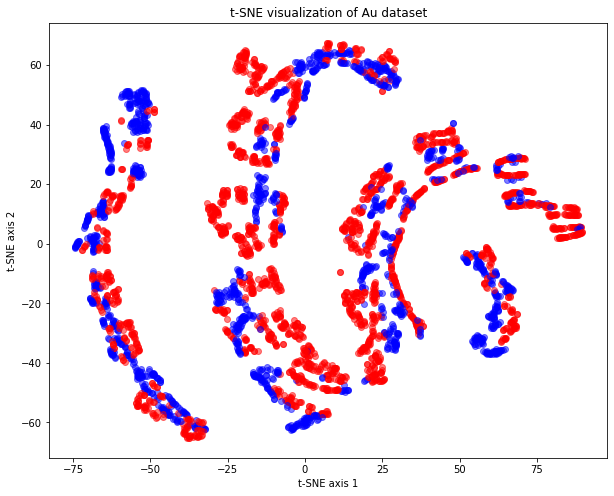

In [74]:
plt.figure(figsize=(10, 8))
col= {True:0 ,False:1}
colors = ['r','b']
tmp =0
for val in df['feature_1'] == 0:
    c = col[val]
    plt.scatter(original_np_tsne[tmp, 0], original_np_tsne[tmp, 1], c = colors[c],  alpha=0.5)
    tmp += 1
# plt.legend()
plt.title('t-SNE visualization of Au dataset')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()
#red is unexplained meaning they are in the 2400 sample since they are all from 0-10 and blue is for explained 1599 samples

## T-sne for all temperature classes (16)  [both splits]

In [79]:
tsne = TSNE(n_components=2, random_state=40)
original_np_tsne = tsne.fit_transform(original_np)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

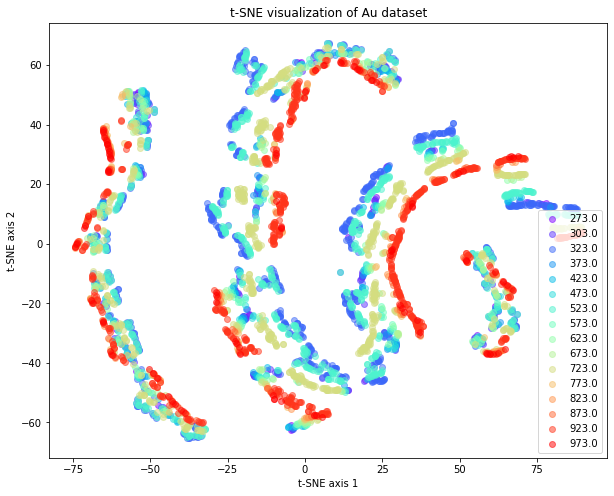

In [95]:
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_values_a)))
temp_val = list(unique_values_a)

for ind, val in enumerate(temp_val):
    samples = df['feature_0'] == val
    plt.scatter(original_np_tsne[samples, 0], original_np_tsne[samples, 1], c = colors[ind], label=temp_val[ind], alpha=0.5)
    
plt.legend()
plt.title('t-SNE visualization of Au dataset')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()
#red is unexplained meaning they are in the 2400 sample since they are all from 0-10 and blue is for explained 1599 samples

In [96]:
explained_np =explained_df.to_numpy()
unexplained_np = unexplained_df.to_numpy()

## Explained dataframe subset

In [97]:
tsne = TSNE(n_components=2, random_state=40)
explained_np_tsne = tsne.fit_transform(explained_np)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

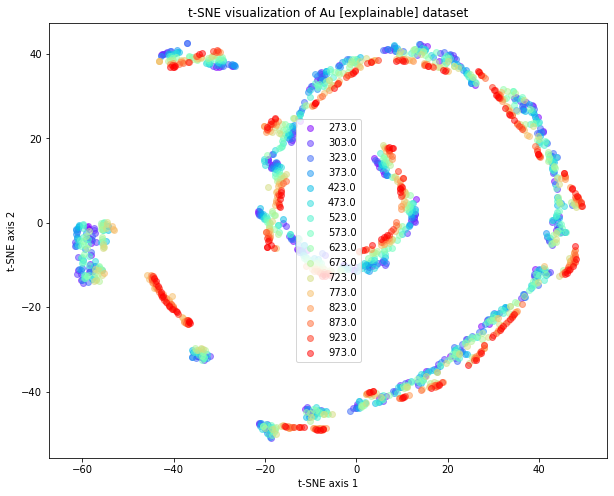

In [99]:
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_values_a)))
temp_val = list(unique_values_a)

for ind, val in enumerate(temp_val):
    samples = explained_df['feature_0'] == val
    plt.scatter(explained_np_tsne[samples, 0], explained_np_tsne[samples, 1], c = colors[ind], label=temp_val[ind], alpha=0.5)
    
plt.legend()
plt.title('t-SNE visualization of Au [explainable] dataset')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()
#red is unexplained meaning they are in the 2400 sample since they are all from 0-10 and blue is for explained 1599 samples

## Unexplained dataframe subset

In [100]:
tsne = TSNE(n_components=2, random_state=40)
unexplained_np_tsne = tsne.fit_transform(unexplained_np)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

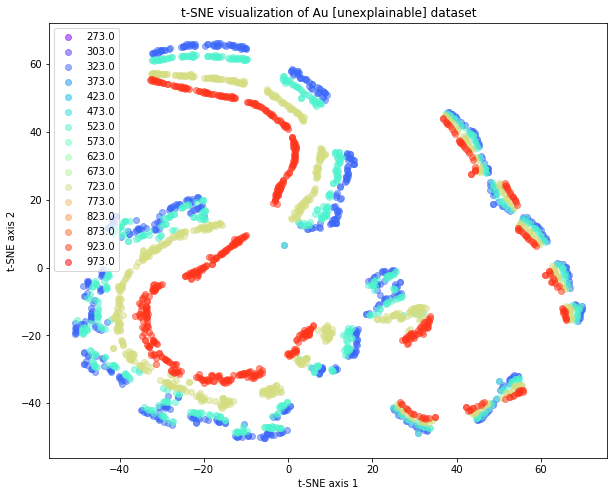

In [112]:
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_values_a)))
temp_val = list(unique_values_a)

for ind, val in enumerate(temp_val):
    samples = unexplained_df['feature_0'] == val
    plt.scatter(unexplained_np_tsne[samples, 0], unexplained_np_tsne[samples, 1], c = colors[ind], label=temp_val[ind], alpha=0.5)
    
plt.legend()
plt.title('t-SNE visualization of Au [unexplainable] dataset')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()
#only 4 colours should be there since there are only 4 temperature values for this

## Visualization of dataset for time-steps [explainable]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

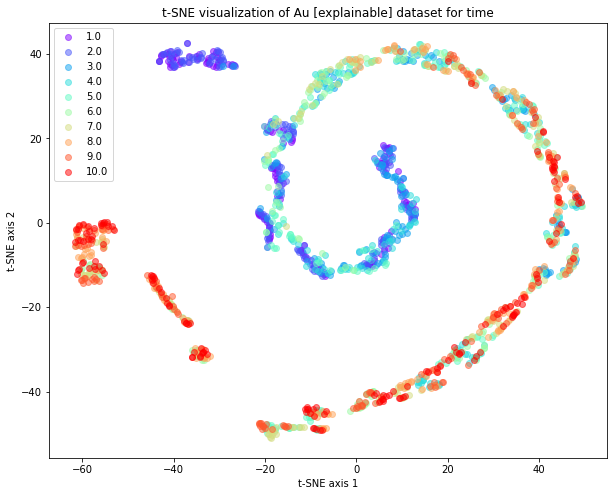

In [106]:
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_values_time)))
temp_val = list(unique_values_time)

for ind, val in enumerate(temp_val):
    samples = explained_df['feature_2'] == val
    plt.scatter(explained_np_tsne[samples, 0], explained_np_tsne[samples, 1], c = colors[ind], label=temp_val[ind], alpha=0.5)
    
plt.legend()
plt.title('t-SNE visualization of Au [explainable] dataset for time')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()
#red is unexplained meaning they are in the 2400 sample since they are all from 0-10 and blue is for explained 1599 samples

## Visualization of dataset [explainable] for growth rate

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

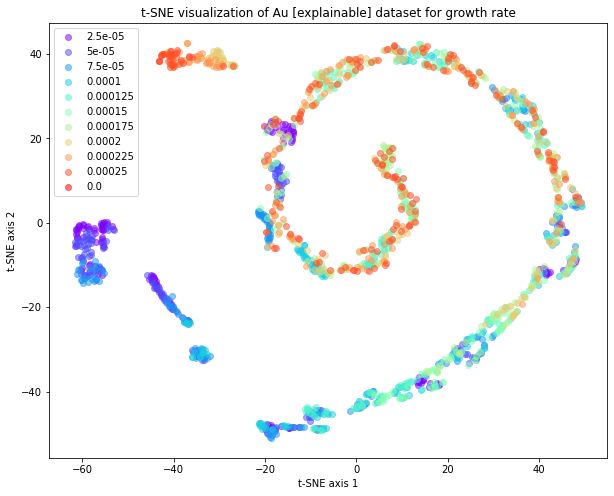

In [110]:
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_values_gr)))
temp_val = list(unique_values_gr)

for ind, val in enumerate(temp_val):
    samples = explained_df['feature_1'] == val
    plt.scatter(explained_np_tsne[samples, 0], explained_np_tsne[samples, 1], c = colors[ind], label=temp_val[ind], alpha=0.5)
    
plt.legend()
plt.title('t-SNE visualization of Au [explainable] dataset for growth rate')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()
#red is unexplained meaning they are in the 2400 sample since they are all from 0-10 and blue is for explained 1599 samples